In [ ]:
# 1. Google Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# 2. NumPy ve gerekli kütüphaneleri yükle
import numpy as np

# 3. Dosya yolunu belirt (Drive'daki konuma göre düzenle)
# Örneğin: 'drive/MyDrive/npy_dosyalarim/data.npy'
file_path = 'drive/MyDrive/cheaters.npy'

# 4. Dosyayı oku
data = np.load(file_path, allow_pickle=True)

# 5. Veri hakkında bilgi ver
print("📊 Veri tipi:", type(data))
try:
    print("📐 Shape:", data.shape)
except:
    print("🧩 Bu veri shape özelliğine sahip değil (muhtemelen dict/list)")

# 6. İlk elemanları göster
print("\n🔍 İlk 5 eleman:")
try:
    print(data[:5])
except:
    for i, item in enumerate(data):
        print(f"{i}: {item}")
        if i >= 4:
            break

# 7. Eğer veri sözlükse tüm anahtarları göster
if isinstance(data, dict):
    print("\n🔑 Sözlük anahtarları:")
    for key in data.keys():
        print(f"- {key}")


Mounted at /content/drive
📊 Veri tipi: <class 'numpy.ndarray'>
📐 Shape: (2000, 30, 192, 5)

🔍 İlk 5 eleman:
[[[[ 0.00000e+00  0.00000e+00  1.17440e+01 -7.41000e-01  0.00000e+00]
   [ 0.00000e+00  0.00000e+00  1.15480e+01 -7.41000e-01  0.00000e+00]
   [ 0.00000e+00  0.00000e+00  1.13150e+01 -7.41000e-01  0.00000e+00]
   ...
   [-1.31800e+00  1.70000e-01  1.01190e+01 -4.16600e+00  0.00000e+00]
   [-5.50000e-02  0.00000e+00  1.01520e+01 -4.16900e+00  0.00000e+00]
   [-1.10000e-01  0.00000e+00  1.02020e+01 -4.17800e+00  0.00000e+00]]

  [[-1.31800e+00  5.50000e-02  1.63157e+02 -1.52440e+01  0.00000e+00]
   [-2.75000e-01  0.00000e+00  1.63811e+02 -1.51780e+01  0.00000e+00]
   [-3.85000e-01  5.50000e-02  1.64718e+02 -1.49490e+01  0.00000e+00]
   ...
   [ 0.00000e+00  0.00000e+00 -1.29481e+02 -7.12800e+00  0.00000e+00]
   [ 0.00000e+00  0.00000e+00 -1.29390e+02 -7.12800e+00  0.00000e+00]
   [ 3.30000e-01  0.00000e+00 -1.29697e+02 -7.12500e+00  0.00000e+00]]

  [[-6.59000e-01  2.20000e-01  1.8

In [ ]:
print("safas")

safas


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eğer veri sayısal ise, ilk 5 elemanın dağılımını ve histogramını çizelim
if isinstance(data, np.ndarray) and data.ndim == 1:  # Tek boyutlu veri (örneğin, liste)
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title('Veri Dağılımı (Histogram)', fontsize=16)
    plt.xlabel('Değerler', fontsize=14)
    plt.ylabel('Frekans', fontsize=14)
    plt.show()

# Veri çok boyutluysa (örneğin, 2D veya 3D), dağılımı farklı şekilde gösterelim
elif isinstance(data, np.ndarray) and data.ndim == 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=False, cmap='viridis')
    plt.title('Veri Isı Haritası (Heatmap)', fontsize=16)
    plt.show()


SMOTE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import drive
import os
from imblearn.over_sampling import SMOTE
import joblib

# Google Drive bağlantısı
drive.mount('/content/drive')

## 1. VERİ YÜKLEME VE ÖN İŞLEME ##
cheaters_path = '/content/drive/MyDrive/cheaters.npy'
cheaters_data = np.load(cheaters_path, allow_pickle=True)

normal_path = '/content/drive/MyDrive/legit.npy'
if os.path.exists(normal_path):
    normal_data = np.load(normal_path, allow_pickle=True)
else:
    print("UYARI: Normal oyuncu verisi bulunamadı. Demo amaçlı hileci verisini kopyalıyoruz.")
    normal_data = cheaters_data.copy() + np.random.normal(0, 0.1, cheaters_data.shape)

cheaters_labels = np.ones(cheaters_data.shape[0])
normal_labels = np.zeros(normal_data.shape[0])

all_data = np.concatenate([cheaters_data[:, :, :, :-1], normal_data[:, :, :, :-1]])
all_labels = np.concatenate([cheaters_labels, normal_labels])

## 2. ÖZELLİK ÇIKARIMI ##
def extract_features(data):
    num_samples = data.shape[0]
    features = []

    for i in range(num_samples):
        sample = data[i]
        mean_features = sample.mean(axis=(0, 1))
        std_features = sample.std(axis=(0, 1))
        max_features = sample.max(axis=(0, 1))
        min_features = sample.min(axis=(0, 1))
        last_5_mean = sample[-5:].mean(axis=(0, 1))
        diff_features = np.diff(sample, axis=0).mean(axis=(0, 1))
        combined = np.concatenate([mean_features, std_features, max_features, min_features, last_5_mean, diff_features])
        features.append(combined)

    return np.array(features)

X_features = extract_features(all_data)
y = all_labels

# SMOTE ile veri dengeleme
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_features, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## 3. RANDOM FOREST MODELİ ##
param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("\nRandom Forest Performansı:")
print(classification_report(y_test, y_pred_rf))

## 4. LSTM MODELİ ##
X_lstm = all_data.reshape(all_data.shape[0], all_data.shape[1], -1)  # (samples, timesteps, features)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42, stratify=y)

lstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

history = lstm_model.fit(X_train_lstm, y_train_lstm,
                         validation_data=(X_test_lstm, y_test_lstm),
                         epochs=50,
                         batch_size=64,
                         verbose=1)

print("\nLSTM Performansı:")
print(classification_report(y_test_lstm, (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")))

## 5. MODEL KAYDETME ##
rf_path = '/content/drive/MyDrive/optimized_csgo_rf_model.pkl'
lstm_path = '/content/drive/MyDrive/optimized_csgo_lstm_model.keras'

joblib.dump(best_rf_model, rf_path)
lstm_model.save(lstm_path)

print(f"\nModeller kaydedildi: {rf_path} ve {lstm_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 81 candidates, totalling 243 fits


CLASS WEIGHT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import drive
import os
import joblib

# Google Drive bağlantısı
drive.mount('/content/drive')

## 1. VERİ YÜKLEME VE ÖN İŞLEME ##
cheaters_path = '/content/drive/MyDrive/cheaters.npy'
cheaters_data = np.load(cheaters_path, allow_pickle=True)

normal_path = '/content/drive/MyDrive/legit.npy'
if os.path.exists(normal_path):
    normal_data = np.load(normal_path, allow_pickle=True)
else:
    print("UYARI: Normal oyuncu verisi bulunamadı. Demo amaçlı hileci verisini kopyalıyoruz.")
    normal_data = cheaters_data.copy() + np.random.normal(0, 0.1, cheaters_data.shape)

cheaters_labels = np.ones(cheaters_data.shape[0])
normal_labels = np.zeros(normal_data.shape[0])

all_data = np.concatenate([cheaters_data[:, :, :, :-1], normal_data[:, :, :, :-1]])
all_labels = np.concatenate([cheaters_labels, normal_labels])

## 2. ÖZELLİK ÇIKARIMI ##
def extract_features(data):
    num_samples = data.shape[0]
    features = []

    for i in range(num_samples):
        sample = data[i]
        mean_features = sample.mean(axis=(0, 1))
        std_features = sample.std(axis=(0, 1))
        max_features = sample.max(axis=(0, 1))
        min_features = sample.min(axis=(0, 1))
        last_5_mean = sample[-5:].mean(axis=(0, 1))
        diff_features = np.diff(sample, axis=0).mean(axis=(0, 1))
        combined = np.concatenate([mean_features, std_features, max_features, min_features, last_5_mean, diff_features])
        features.append(combined)

    return np.array(features)

X_features = extract_features(all_data)
y = all_labels

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42, stratify=y)

## 3. RANDOM FOREST MODELİ ##
# Class weight hesapla
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_rf = dict(enumerate(class_weights_rf))

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight=class_weights_rf, random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("\nRandom Forest Performansı:")
print(classification_report(y_test, y_pred_rf))

## 4. LSTM MODELİ ##
X_lstm = all_data.reshape(all_data.shape[0], all_data.shape[1], -1)  # (samples, timesteps, features)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42, stratify=y)

# Class weight hesapla (LSTM için)
class_weights_lstm = compute_class_weight('balanced', classes=np.unique(y_train_lstm), y=y_train_lstm)
class_weights_lstm = dict(enumerate(class_weights_lstm))

lstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=50,
    batch_size=64,
    verbose=1,
    class_weight=class_weights_lstm
)

print("\nLSTM Performansı:")
print(classification_report(y_test_lstm, (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")))

## 5. MODEL KAYDETME ##
rf_path = '/content/drive/MyDrive/optimized_csgo_rf_model.pkl'
lstm_path = '/content/drive/MyDrive/optimized_csgo_lstm_model.keras'

joblib.dump(best_rf_model, rf_path)
lstm_model.save(lstm_path)

print(f"\nModeller kaydedildi: {rf_path} ve {lstm_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Random Forest Performansı:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2000
         1.0       0.57      0.01      0.02       400

    accuracy                           0.83      2400
   macro avg       0.70      0.50      0.46      2400
weighted avg       0.79      0.83      0.76      2400



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - AUC: 0.4871 - accuracy: 0.5126 - loss: 0.7003 - val_AUC: 0.5508 - val_accuracy: 0.8338 - val_loss: 0.6774
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - AUC: 0.5328 - accuracy: 0.7641 - loss: 0.6870 - val_AUC: 0.5239 - val_accuracy: 0.8338 - val_loss: 0.6489
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.5103 - accuracy: 0.7494 - loss: 0.6857 - val_AUC: 0.5529 - val_accuracy: 0.7733 - val_loss: 0.6798
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - AUC: 0.5399 - accuracy: 0.6923 - loss: 0.6886 - val_AUC: 0.5477 - val_accuracy: 0.7404 - val_loss: 0.6884
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.5585 - accuracy: 0.6547 - loss: 0.6886 - val_AUC: 0.5859 - val_accuracy: 0.4958 - val_loss: 0.7107
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC: 0.5528 - accuracy: 0.6334 - loss: 0.6828 - val_AUC: 0.5241 - val_accuracy: 0.8321 - val_loss: 0.6627
Epoch 7/50
150/150 ━━━━━━━━━━━━━━

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sınıf oranı (scale_pos_weight): 5.00
[0]	validation_0-logloss:0.68989
[1]	validation_0-logloss:0.68684
[2]	validation_0-logloss:0.68424
[3]	validation_0-logloss:0.68102
[4]	validation_0-logloss:0.67838
[5]	validation_0-logloss:0.67589
[6]	validation_0-logloss:0.67319
[7]	validation_0-logloss:0.67156
[8]	validation_0-logloss:0.66971
[9]	validation_0-logloss:0.66778
[10]	validation_0-logloss:0.66568
[11]	validation_0-logloss:0.66377
[12]	validation_0-logloss:0.66179
[13]	validation_0-logloss:0.66050
[14]	validation_0-logloss:0.65882
[15]	validation_0-logloss:0.65756
[16]	validation_0-logloss:0.65558
[17]	validation_0-logloss:0.65397
[18]	validation_0-logloss:0.65181
[19]	validation_0-logloss:0.65047
[20]	validation_0-logloss:0.64899
[21]	validation_0-logloss:0.64777
[22]	validation_0-logloss:0.64717
[23]	validation_0-logloss:0.64643
[24]	validation_0-logloss:0.

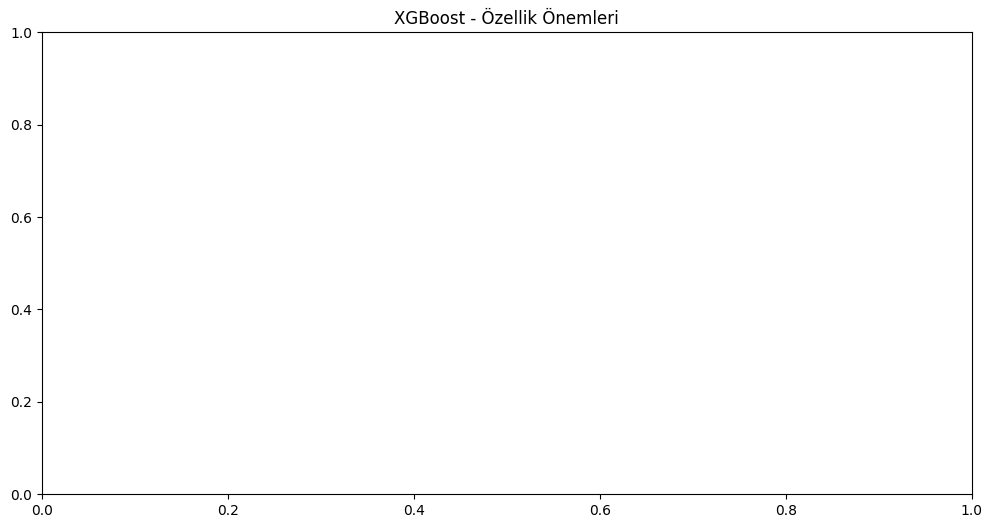

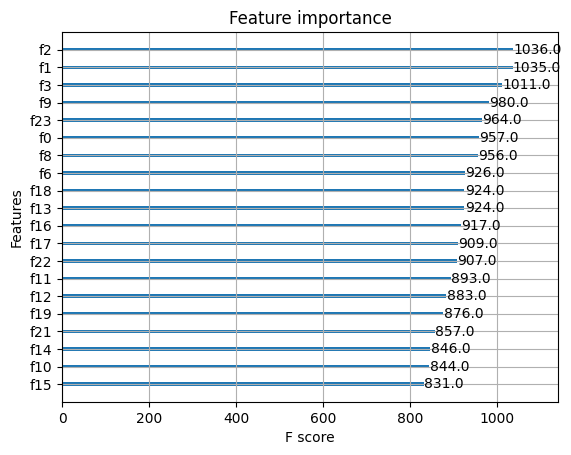


Model kaydedildi: /content/drive/MyDrive/optimized_csgo_xgb_model.pkl


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import os
import joblib
from google.colab import drive

drive.mount('/content/drive')
## 1. VERİ YÜKLEME VE ÖN İŞLEME ##
cheaters_path = '/content/drive/MyDrive/cheaters.npy'
cheaters_data = np.load(cheaters_path, allow_pickle=True)

normal_path = '/content/drive/MyDrive/legit.npy'
if os.path.exists(normal_path):
    normal_data = np.load(normal_path, allow_pickle=True)
else:
    print("UYARI: Normal oyuncu verisi bulunamadı. Demo amaçlı hileci verisini kopyalıyoruz.")
    normal_data = cheaters_data.copy() + np.random.normal(0, 0.1, cheaters_data.shape)

cheaters_labels = np.ones(cheaters_data.shape[0])
normal_labels = np.zeros(normal_data.shape[0])

all_data = np.concatenate([cheaters_data[:, :, :, :-1], normal_data[:, :, :, :-1]])
all_labels = np.concatenate([cheaters_labels, normal_labels])

## 2. ÖZELLİK ÇIKARIMI ##
def extract_features(data):
    num_samples = data.shape[0]
    features = []

    for i in range(num_samples):
        sample = data[i]
        mean_features = sample.mean(axis=(0, 1))
        std_features = sample.std(axis=(0, 1))
        max_features = sample.max(axis=(0, 1))
        min_features = sample.min(axis=(0, 1))
        last_5_mean = sample[-5:].mean(axis=(0, 1))
        diff_features = np.diff(sample, axis=0).mean(axis=(0, 1))
        combined = np.concatenate([mean_features, std_features, max_features, min_features, last_5_mean, diff_features])
        features.append(combined)

    return np.array(features)

X_features = extract_features(all_data)
y = all_labels

# DOĞRUDAN ORAN HESABI İLE CLASS WEIGHT
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42, stratify=y)

# Sınıf oranı hesaplama (negatif / pozitif)
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos
print(f"Sınıf oranı (scale_pos_weight): {scale_pos_weight:.2f}")

## 3. XGBOOST MODELİ ##
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric="logloss",
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight  # SMOTE yerine class ağırlığı
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Model Tahmini
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Performans değerlendirme
print("\nXGBoost Performansı:")
print(classification_report(y_test, y_pred_xgb))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")
print(f"ROC AUC Skoru: {roc_auc_score(y_test, y_proba_xgb):.4f}")

# Özellik önemleri görselleştirme
plt.figure(figsize=(12, 6))
plt.title("XGBoost - Özellik Önemleri")
xgb.plot_importance(xgb_model, max_num_features=20)
plt.show()

## 4. MODEL KAYDETME ##
xgb_path = '/content/drive/MyDrive/optimized_csgo_xgb_model.pkl'
joblib.dump(xgb_model, xgb_path)

print(f"\nModel kaydedildi: {xgb_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (2000, 30, 192, 5)


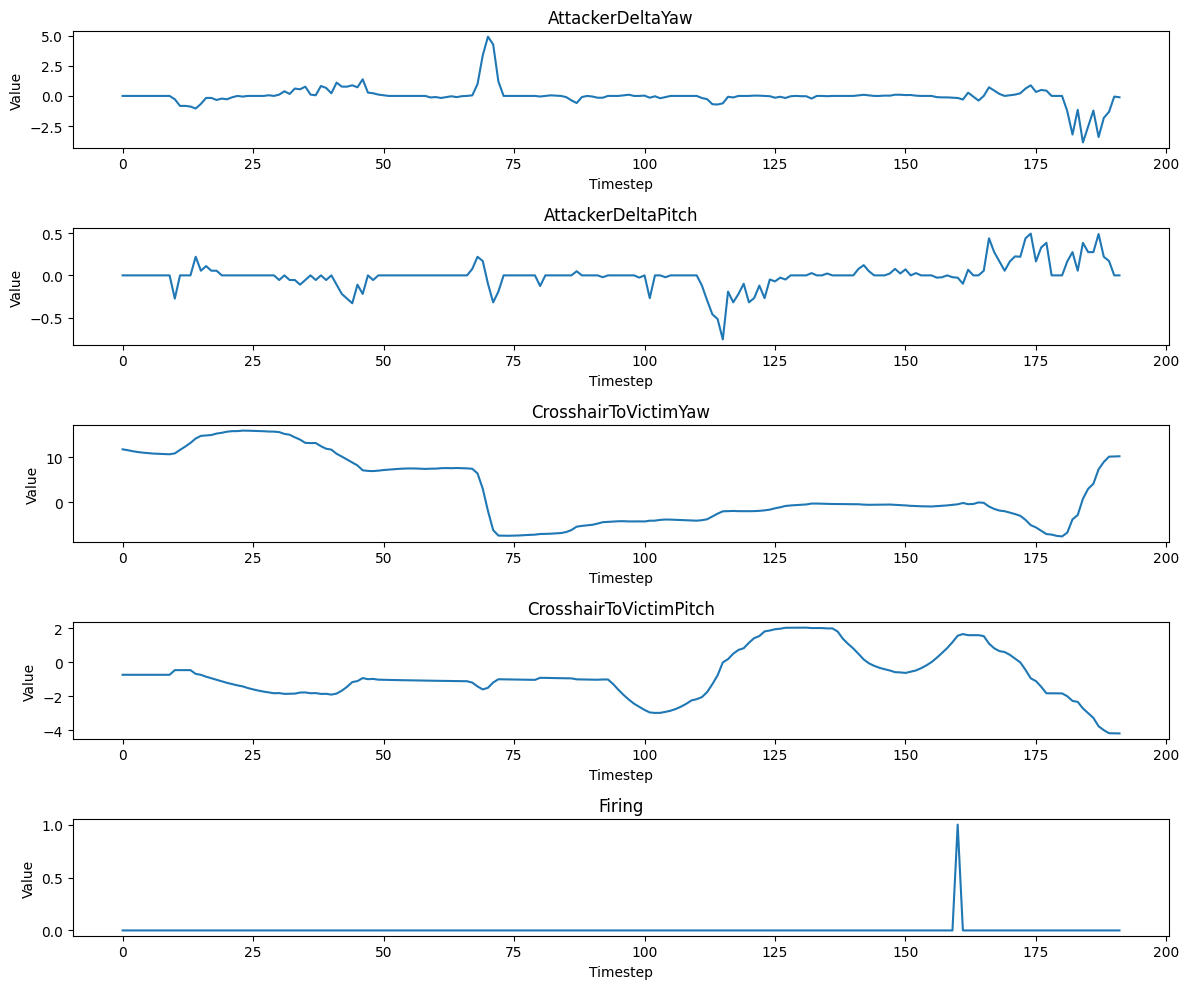

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/cheaters.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# Her değişkeni ayrı subplot'ta çiz
plt.figure(figsize=(12, 10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(sample[:, i])
    plt.title(features[i])
    plt.xlabel("Timestep")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (2000, 30, 192, 5)


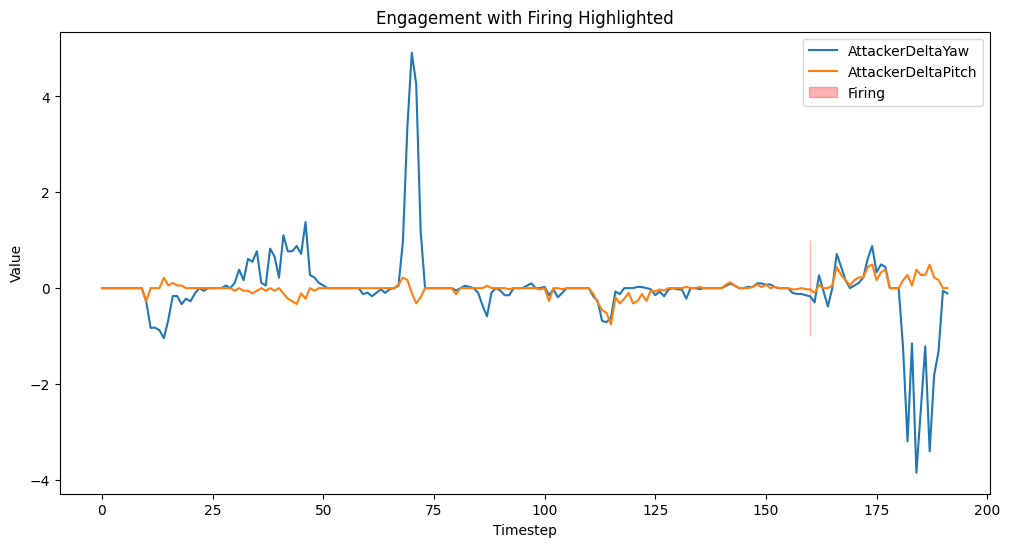

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/cheaters.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# Firing olduğu yerleri vurgulayalım
firing = sample[:, 4]
time = np.arange(192)

plt.figure(figsize=(12, 6))
plt.plot(time, sample[:, 0], label="AttackerDeltaYaw")
plt.plot(time, sample[:, 1], label="AttackerDeltaPitch")
plt.fill_between(time, -1, 1, where=firing > 0.5, color='red', alpha=0.3, label='Firing')
plt.legend()
plt.title("Engagement with Firing Highlighted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (2000, 30, 192, 5)


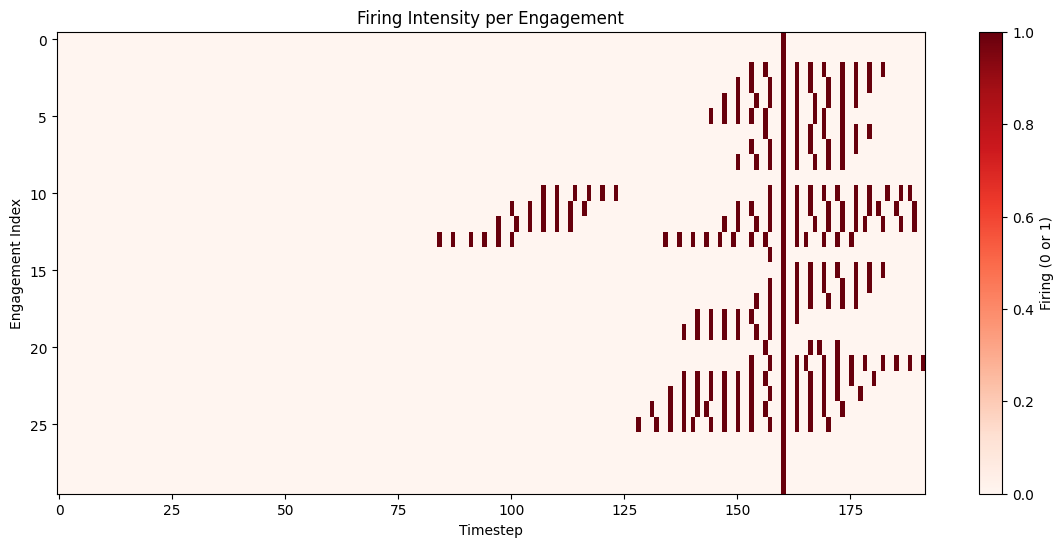

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/cheaters.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# İlk oyuncunun 30 engagement'ında firing örüntüsü
firing_map = data[player_index, :, :, 4]  # (30, 192)

plt.figure(figsize=(14, 6))
plt.imshow(firing_map, aspect='auto', cmap='Reds')
plt.colorbar(label="Firing (0 or 1)")
plt.xlabel("Timestep")
plt.ylabel("Engagement Index")
plt.title("Firing Intensity per Engagement")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (10000, 30, 192, 5)


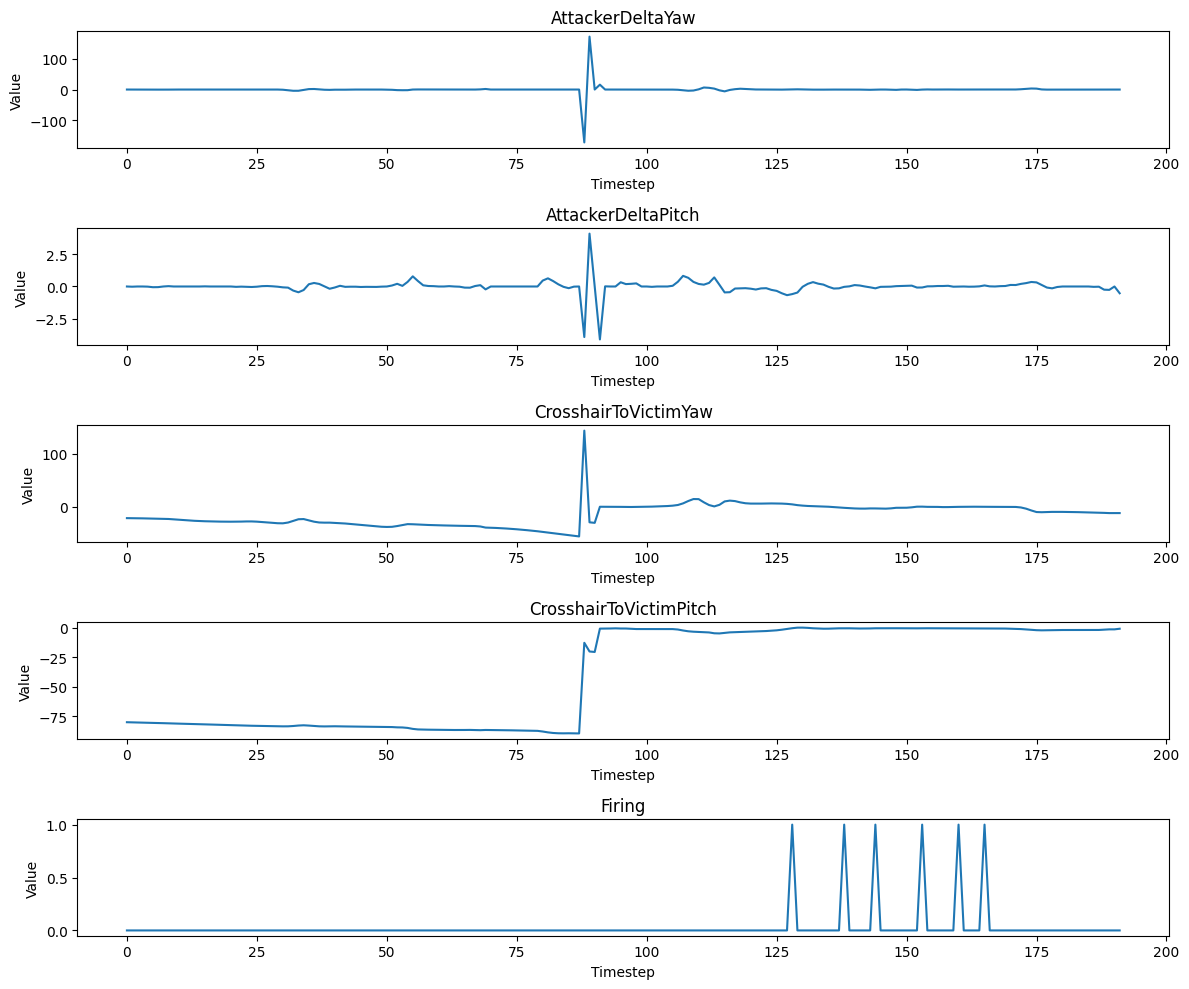

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/legit.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# Her değişkeni ayrı subplot'ta çiz
plt.figure(figsize=(12, 10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(sample[:, i])
    plt.title(features[i])
    plt.xlabel("Timestep")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (10000, 30, 192, 5)


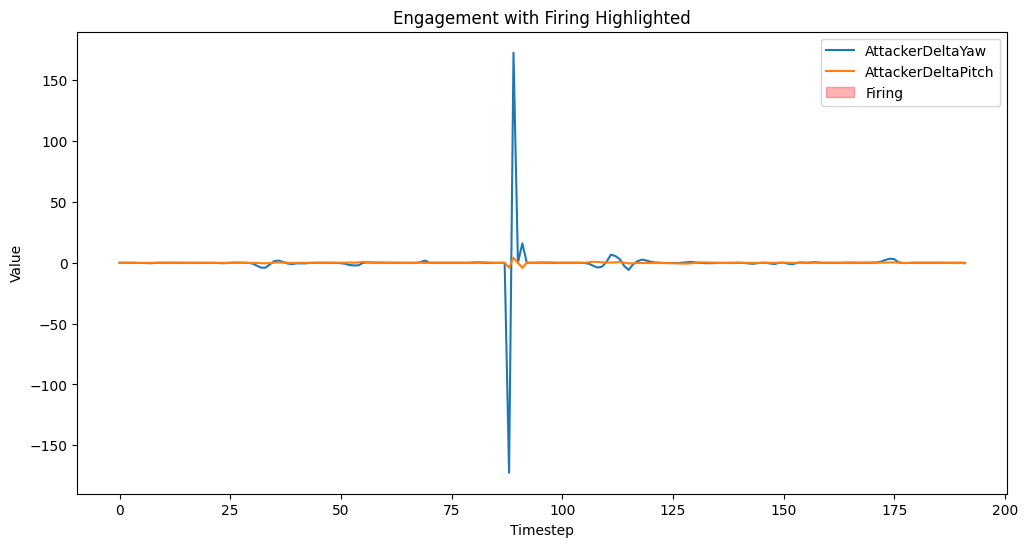

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/legit.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# Firing olduğu yerleri vurgulayalım
firing = sample[:, 4]
time = np.arange(192)

plt.figure(figsize=(12, 6))
plt.plot(time, sample[:, 0], label="AttackerDeltaYaw")
plt.plot(time, sample[:, 1], label="AttackerDeltaPitch")
plt.fill_between(time, -1, 1, where=firing > 0.5, color='red', alpha=0.3, label='Firing')
plt.legend()
plt.title("Engagement with Firing Highlighted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (10000, 30, 192, 5)


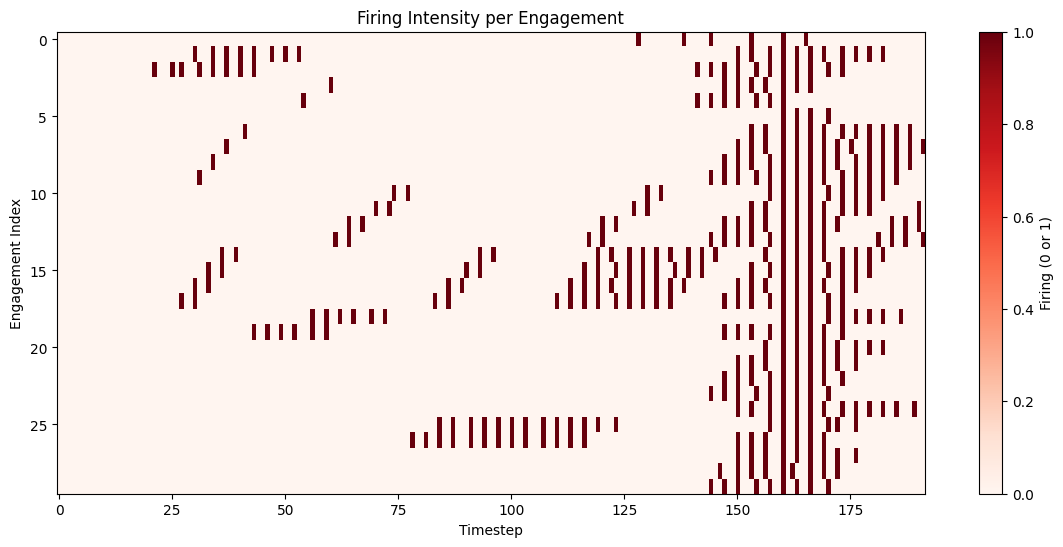

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/legit.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# İlk oyuncunun 30 engagement'ında firing örüntüsü
firing_map = data[player_index, :, :, 4]  # (30, 192)

plt.figure(figsize=(14, 6))
plt.imshow(firing_map, aspect='auto', cmap='Reds')
plt.colorbar(label="Firing (0 or 1)")
plt.xlabel("Timestep")
plt.ylabel("Engagement Index")
plt.title("Firing Intensity per Engagement")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (2000, 30, 192, 5)


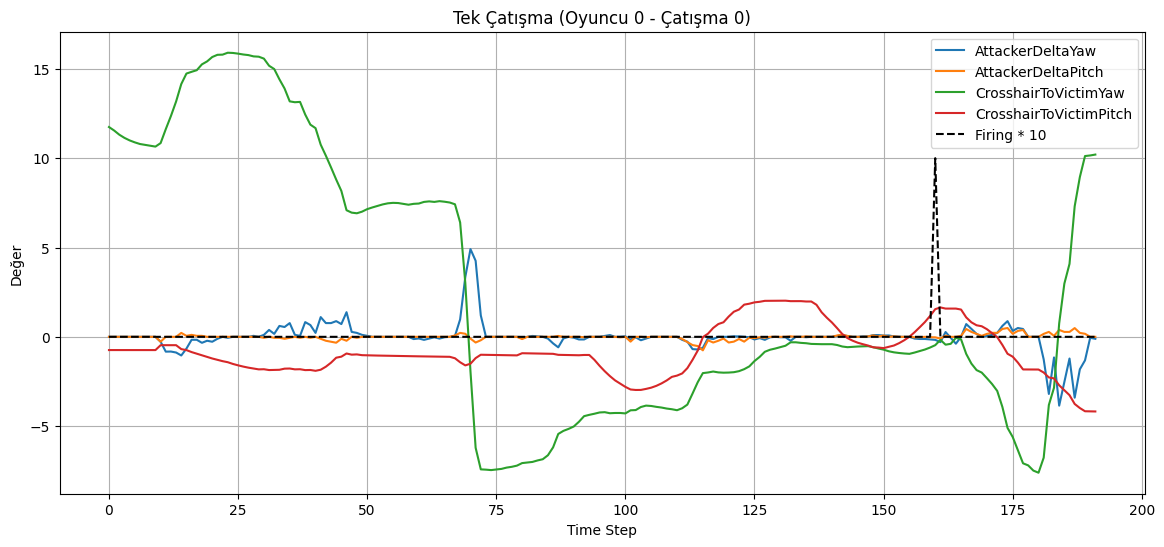

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/cheaters.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# İlk oyuncunun 30 engagement'ında firing örüntüsü
engagement = data[0, 0]  # 192x5
timesteps = np.arange(192)

plt.figure(figsize=(14, 6))
for i in range(4):
    plt.plot(timesteps, engagement[:, i], label=features[i])
plt.plot(timesteps, engagement[:, 4] * 10, label='Firing * 10', linestyle='--', color='black')
plt.title("Tek Çatışma (Oyuncu 0 - Çatışma 0)")
plt.xlabel("Time Step")
plt.ylabel("Değer")
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri şekli: (10000, 30, 192, 5)


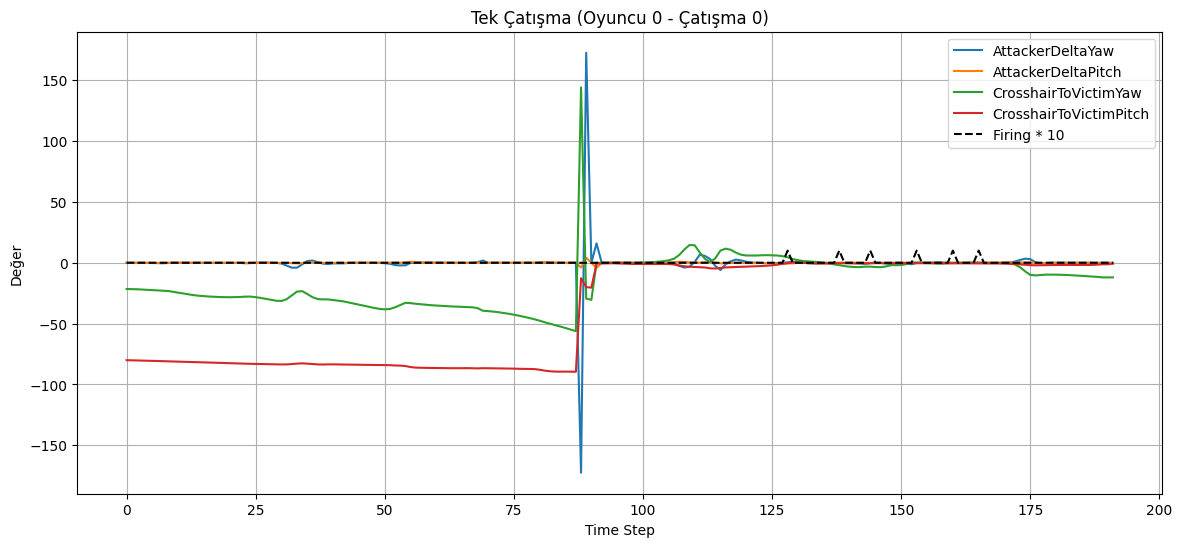

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolunu buraya yaz
data_path = "/content/drive/MyDrive/legit.npy"  # ← kendi dosya adını gir

# Veriyi yükle
data = np.load(data_path)
print("Veri şekli:", data.shape)

# Bir oyuncunun 30 karşılaşmasından birini seçelim
player_index = 0
engagement_index = 0

sample = data[player_index, engagement_index]  # (192, 5)

# Değişken isimleri
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]

# İlk oyuncunun 30 engagement'ında firing örüntüsü
engagement = data[0, 0]  # 192x5
timesteps = np.arange(192)

plt.figure(figsize=(14, 6))
for i in range(4):
    plt.plot(timesteps, engagement[:, i], label=features[i])
plt.plot(timesteps, engagement[:, 4] * 10, label='Firing * 10', linestyle='--', color='black')
plt.title("Tek Çatışma (Oyuncu 0 - Çatışma 0)")
plt.xlabel("Time Step")
plt.ylabel("Değer")
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Temiz oyuncular verisi: (10000, 30, 192, 5)
Hileci oyuncular verisi: (2000, 30, 192, 5)


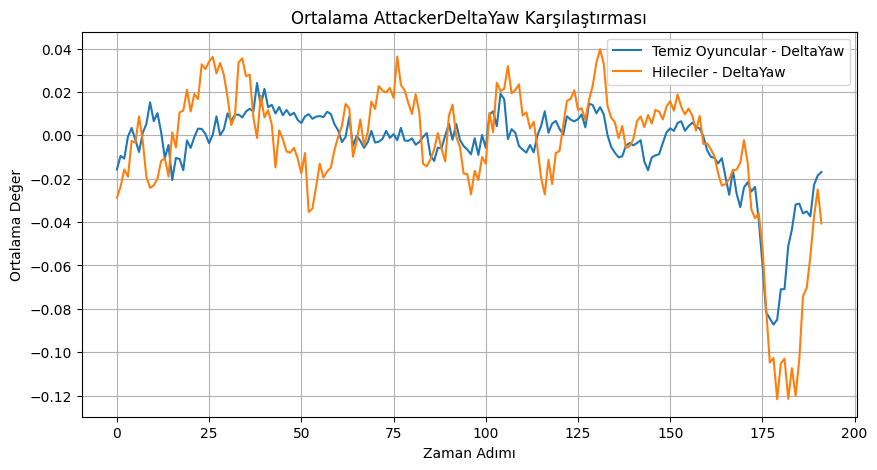

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolları
cheaters_path = "/content/drive/MyDrive/cheaters.npy"
legit_path = "/content/drive/MyDrive/legit.npy"

# Verileri yükle
cheater_players = np.load(cheaters_path)
clean_players = np.load(legit_path)

print("Temiz oyuncular verisi:", clean_players.shape)
print("Hileci oyuncular verisi:", cheater_players.shape)

# Özellik adları
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]
timesteps = np.arange(192)

# ----------------------------
# 1. Ortalama Zaman Serisi Karşılaştırması (örnek: DeltaYaw)
# ----------------------------
mean_clean_dyaw = clean_players[:, :, :, 0].mean(axis=(0, 1))
mean_cheat_dyaw = cheater_players[:, :, :, 0].mean(axis=(0, 1))

plt.figure(figsize=(10, 5))
plt.plot(mean_clean_dyaw, label="Temiz Oyuncular - DeltaYaw")
plt.plot(mean_cheat_dyaw, label="Hileciler - DeltaYaw")
plt.title("Ortalama AttackerDeltaYaw Karşılaştırması")
plt.xlabel("Zaman Adımı")
plt.ylabel("Ortalama Değer")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Temiz oyuncular verisi: (10000, 30, 192, 5)
Hileci oyuncular verisi: (2000, 30, 192, 5)


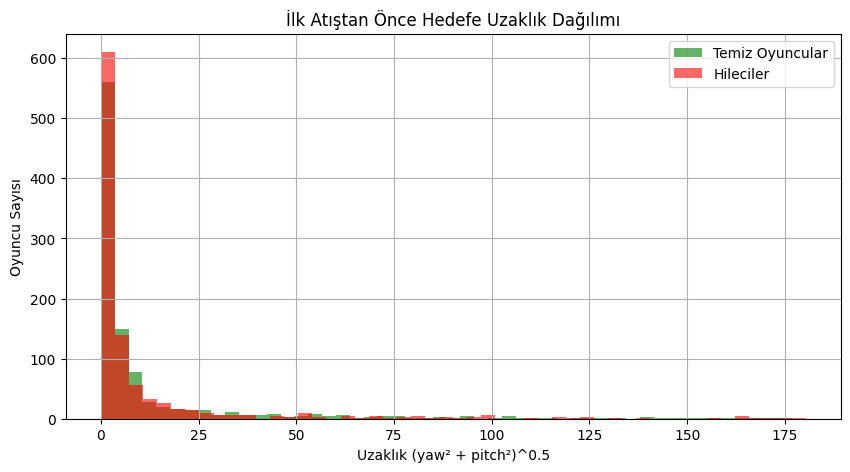

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolları
cheaters_path = "/content/drive/MyDrive/cheaters.npy"
legit_path = "/content/drive/MyDrive/legit.npy"

# Verileri yükle
cheater_players = np.load(cheaters_path)
clean_players = np.load(legit_path)

print("Temiz oyuncular verisi:", clean_players.shape)
print("Hileci oyuncular verisi:", cheater_players.shape)

# Özellik adları
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]
timesteps = np.arange(192)

# 3. İlk atıştan hemen önce hedefe uzaklık histogramı
# ----------------------------
def get_pre_firing_distance(sample):
    for i in range(1, 192):
        if sample[i, 4] == 1:
            yaw = sample[i-1, 2]
            pitch = sample[i-1, 3]
            return np.sqrt(yaw**2 + pitch**2)
    return None

# 1000 oyuncu örneği ile histogram çiz
clean_distances = [get_pre_firing_distance(player[0]) for player in clean_players[:1000]]
cheat_distances = [get_pre_firing_distance(player[0]) for player in cheater_players[:1000]]

# NaN'leri temizle
clean_distances = [d for d in clean_distances if d is not None]
cheat_distances = [d for d in cheat_distances if d is not None]

plt.figure(figsize=(10, 5))
plt.hist(clean_distances, bins=50, alpha=0.6, label="Temiz Oyuncular", color="green")
plt.hist(cheat_distances, bins=50, alpha=0.6, label="Hileciler", color="red")
plt.title("İlk Atıştan Önce Hedefe Uzaklık Dağılımı")
plt.xlabel("Uzaklık (yaw² + pitch²)^0.5")
plt.ylabel("Oyuncu Sayısı")
plt.legend()
plt.grid(True)
plt.show()

Mounted at /content/drive
Temiz oyuncular verisi: (10000, 30, 192, 5)
Hileci oyuncular verisi: (2000, 30, 192, 5)


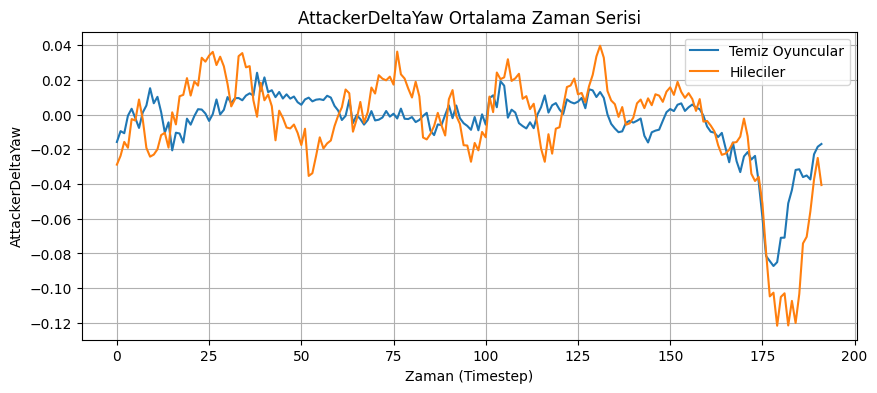

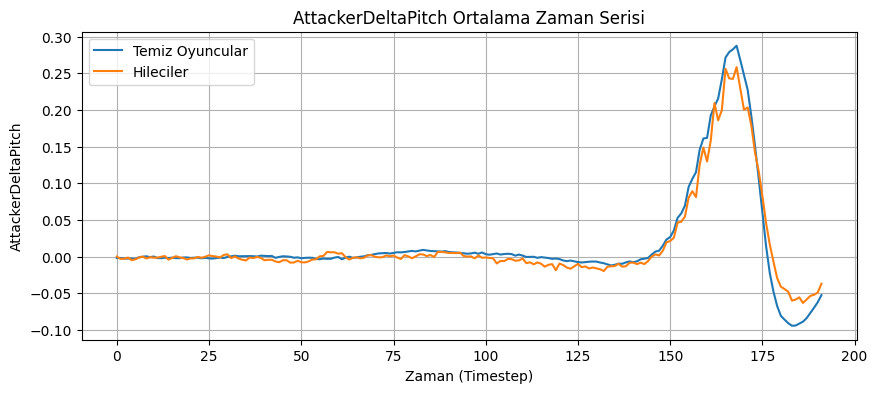

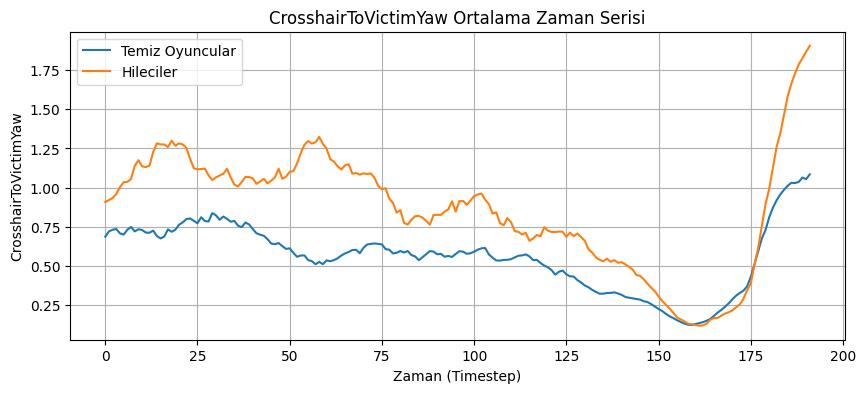

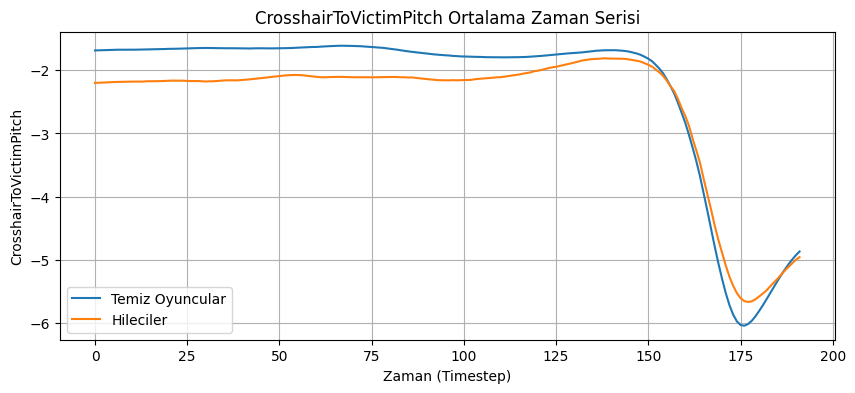

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolları
cheaters_path = "/content/drive/MyDrive/cheaters.npy"
legit_path = "/content/drive/MyDrive/legit.npy"

# Verileri yükle
cheater_players = np.load(cheaters_path)
clean_players = np.load(legit_path)

print("Temiz oyuncular verisi:", clean_players.shape)
print("Hileci oyuncular verisi:", cheater_players.shape)

# Özellik adları
features = ["AttackerDeltaYaw", "AttackerDeltaPitch", "CrosshairToVictimYaw", "CrosshairToVictimPitch", "Firing"]
timesteps = np.arange(192)

def plot_time_series_mean(var_index, var_name):
    mean_clean = clean_players[:, :, :, var_index].mean(axis=(0, 1))
    mean_cheat = cheater_players[:, :, :, var_index].mean(axis=(0, 1))

    plt.figure(figsize=(10, 4))
    plt.plot(mean_clean, label="Temiz Oyuncular")
    plt.plot(mean_cheat, label="Hileciler")
    plt.title(f"{var_name} Ortalama Zaman Serisi")
    plt.xlabel("Zaman (Timestep)")
    plt.ylabel(var_name)
    plt.legend()
    plt.grid(True)
    plt.show()

for i, name in enumerate(features[:-1]):  # Firing hariç
    plot_time_series_mean(i, name)

In [ ]:
# 1. Google Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# 2. NumPy ve gerekli kütüphaneleri yükle
import numpy as np

# 3. Dosya yolunu belirt (Drive'daki konuma göre düzenle)
file_path = '/content/drive/MyDrive/cheaters.npy'

# 4. Dosyayı oku
data = np.load(file_path, allow_pickle=True)

# 5. Veri hakkında genel bilgi ver
print("📊 Veri tipi:", type(data))
try:
    print("📐 Shape:", data.shape)
except:
    print("🧩 Bu veri shape özelliğine sahip değil (muhtemelen dict/list)")

# 6. İlk elemanı al
first_entry = data[0]

print("\n🔍 İlk eleman tipi:", type(first_entry))
print("📄 İlk eleman içeriği:", first_entry)

# 7. Parametreleri çıkar
print("\n🎯 Seçilen parametreler:")

if isinstance(first_entry, dict):
    # Dict içindeyse anahtarlardan oku
    keys = ['AttackerDeltaYaw', 'AttackerDeltaPitch', 'CrosshairToVictimYaw', 'CrosshairToVictimPitch', 'Firing']
    for key in keys:
        value = first_entry.get(key, "❌ Yok")
        print(f"{key}: {value}")

elif isinstance(first_entry, (list, tuple, np.ndarray)) and len(first_entry) >= 5:
    # Liste/tuple/array içindeyse sırasıyla al
    print("AttackerDeltaYaw:", first_entry[0])
    print("AttackerDeltaPitch:", first_entry[1])
    print("CrosshairToVictimYaw:", first_entry[2])
    print("CrosshairToVictimPitch:", first_entry[3])
    print("Firing:", first_entry[4])

else:
    print("❗ Beklenmeyen format. Yapı desteklenmiyor veya eksik veri olabilir.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 Veri tipi: <class 'numpy.ndarray'>
📐 Shape: (2000, 30, 192, 5)

🔍 İlk eleman tipi: <class 'numpy.ndarray'>
📄 İlk eleman içeriği: [[[ 0.00000e+00  0.00000e+00  1.17440e+01 -7.41000e-01  0.00000e+00]
  [ 0.00000e+00  0.00000e+00  1.15480e+01 -7.41000e-01  0.00000e+00]
  [ 0.00000e+00  0.00000e+00  1.13150e+01 -7.41000e-01  0.00000e+00]
  ...
  [-1.31800e+00  1.70000e-01  1.01190e+01 -4.16600e+00  0.00000e+00]
  [-5.50000e-02  0.00000e+00  1.01520e+01 -4.16900e+00  0.00000e+00]
  [-1.10000e-01  0.00000e+00  1.02020e+01 -4.17800e+00  0.00000e+00]]

 [[-1.31800e+00  5.50000e-02  1.63157e+02 -1.52440e+01  0.00000e+00]
  [-2.75000e-01  0.00000e+00  1.63811e+02 -1.51780e+01  0.00000e+00]
  [-3.85000e-01  5.50000e-02  1.64718e+02 -1.49490e+01  0.00000e+00]
  ...
  [ 0.00000e+00  0.00000e+00 -1.29481e+02 -7.12800e+00  0.00000e+00]
  [ 0.00000e+00  0.00000e+00 -1.2939

In [ ]:
!pip install gradio
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import drive

# Google Drive'ı bağla ve modeli yükle
drive.mount('/content/drive')
model_path = "/content/drive/MyDrive/optimized_csgo_lstm_model.keras"
lstm_model = load_model(model_path)

# Tahmin fonksiyonu
def predict_cheat(delta_yaw, delta_pitch, cross_yaw, cross_pitch, firing):
    try:
        # Girdi listelerini düzleştir ve virgülle ayırarak sayıları al
        delta_yaw = np.array([float(i) for i in delta_yaw.split(',')]).flatten()
        delta_pitch = np.array([float(i) for i in delta_pitch.split(',')]).flatten()
        cross_yaw = np.array([float(i) for i in cross_yaw.split(',')]).flatten()
        cross_pitch = np.array([float(i) for i in cross_pitch.split(',')]).flatten()
        firing = np.array([float(i) for i in firing.split(',')]).flatten()

        # 10 zaman adımı olmalı (5 zaman adımı için 2 dilim)
        if not (len(delta_yaw) == len(delta_pitch) == len(cross_yaw) == len(cross_pitch) == len(firing) == 10):
            return "❌ Her özellik tam olarak 10 sayı içermelidir."

        # Zaman adımı şeklinde (timestep, features) oluştur: shape = (10, 5)
        features = np.array([delta_yaw, delta_pitch, cross_yaw, cross_pitch, firing]).T  # (10, 5)

        # LSTM için (1, 10, 5) şekline getir
        input_seq = np.expand_dims(features, axis=0)  # Bu (1, 10, 5) olacak

        # Tahmin yap
        prob = lstm_model.predict(input_seq)[0][0]
        result = "Hileci" if prob > 0.5 else "Temiz"
        return f"🔍 Tahmin: {result} | Hile olma olasılığı: %{prob * 100:.2f}"
    except Exception as e:
        return f"❌ Hata oluştu: {str(e)}"

# Gradio arayüzü
interface = gr.Interface(
    fn=predict_cheat,
    inputs=[
        gr.Textbox(label="AttackerDeltaYaw (10 değer, virgülle ayırarak girin: ilk 5 değer, ikinci 5 değer)"),
        gr.Textbox(label="AttackerDeltaPitch (10 değer, virgülle ayırarak girin: ilk 5 değer, ikinci 5 değer)"),
        gr.Textbox(label="CrosshairToVictimYaw (10 değer, virgülle ayırarak girin: ilk 5 değer, ikinci 5 değer)"),
        gr.Textbox(label="CrosshairToVictimPitch (10 değer, virgülle ayırarak girin: ilk 5 değer, ikinci 5 değer)"),
        gr.Textbox(label="Firing (10 değer, 0 veya 1, virgülle ayırarak girin: ilk 5 değer, ikinci 5 değer)")
    ],
    outputs="text",
    title="🎯 CS2 Hileci Oyuncu Tahmin Sistemi",
    description="10 değer girerek (5 zaman adımı için 2 dilim) oyuncunun hileci olup olmadığını tahmin edin. Her özelliği virgülle ayırarak girin."
)

# Başlat
interface.launch()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5513908ce734968da0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
